# Libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Loading Dataset

In [16]:
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')
df_neighbourhoods = pd.read_csv('neighbourhoods.csv')
gdf_neighbourhoods = gpd.read_file('neighbourhoods.geojson')

# Data Cleaning

In [20]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27934,https://www.airbnb.com/rooms/27934,20231225202639,2023-12-27,city scrape,Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...,NaN,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,...,4.91,4.66,4.75,NaN,f,2,2,0,0,0.45
1,27979,https://www.airbnb.com/rooms/27979,20231225202639,2023-12-26,previous scrape,Rental unit in Bangkok · 1 bedroom · 2 beds · ...,NaN,NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
2,28745,https://www.airbnb.com/rooms/28745,20231225202639,2023-12-26,previous scrape,Rental unit in Bangkok · 1 bedroom · 1 bed · 1...,NaN,Ramkumheang neigbourhood - hip place with food...,https://a0.muscache.com/pictures/160369/92a7ec...,123784,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,820395,https://www.airbnb.com/rooms/820395,20231225202639,2023-12-26,city scrape,Guesthouse in Bangkok · ★4.77 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/a2b17c9f-bf74...,822284,...,4.92,3.83,4.69,NaN,f,8,8,0,0,0.10
4,1255386,https://www.airbnb.com/rooms/1255386,20231225202639,2023-12-26,previous scrape,Rental unit in Dusit · 1 bedroom · 3 beds · 1 ...,NaN,- The Grand Palace is 10 minutes away by boat ...,https://a0.muscache.com/pictures/2e26aae0-dc4f...,6838199,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN


In [22]:
#Summary of the listings dataset
df_listings.info()
df_listings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22104 entries, 0 to 22103
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22104 non-null  int64  
 1   listing_url                                   22104 non-null  object 
 2   scrape_id                                     22104 non-null  int64  
 3   last_scraped                                  22104 non-null  object 
 4   source                                        22104 non-null  object 
 5   name                                          22104 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         10200 non-null  object 
 8   picture_url                                   22104 non-null  object 
 9   host_id                                       22104 non-null 

,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.210400e+04,2.210400e+04,0.0,2.210400e+04,22104.000000,22104.000000,0.0,22104.000000,22104.000000,22104.000000,...,14155.000000,14162.000000,14154.000000,14154.000000,0.0,22104.000000,22104.000000,22104.000000,22104.000000,14162.000000
mean,4.311415e+17,2.023123e+13,NaN,2.070399e+08,35.106904,46.379343,NaN,13.744426,100.562033,3.137984,...,4.729327,4.758447,4.616926,4.630731,NaN,23.785016,18.412505,4.686346,0.298453,0.973434
std,4.450022e+17,9.863504e+00,NaN,1.737502e+08,78.422211,98.077562,NaN,0.041207,0.049244,2.270743,...,0.552314,0.528029,0.532128,0.566440,NaN,41.836205,39.367348,16.802962,1.650503,1.434982
min,2.793400e+04,2.023123e+13,NaN,2.144700e+04,0.000000,0.000000,NaN,13.527300,100.329550,1.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.924233e+07,2.023123e+13,NaN,4.853662e+07,2.000000,3.000000,NaN,13.719570,100.532250,2.000000,...,4.710000,4.750000,4.500000,4.550000,NaN,2.000000,0.000000,0.000000,0.000000,0.180000
50%,5.381190e+07,2.023123e+13,NaN,1.652139e+08,7.000000,10.000000,NaN,13.738820,100.563800,2.000000,...,4.910000,4.940000,4.750000,4.780000,NaN,6.000000,2.000000,0.000000,0.000000,0.540000
75%,8.897166e+17,2.023123e+13,NaN,3.336703e+08,32.000000,45.000000,NaN,13.758170,100.585010,4.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,26.000000,16.000000,3.000000,0.000000,1.250000
max,1.053584e+18,2.023123e+13,NaN,5.522846e+08,731.000000,875.000000,NaN,13.953540,100.923710,16.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,230.000000,229.000000,151.000000,24.000000,62.140000


In [24]:
#Missing values
df_listings.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               7942
Length: 75, dtype: int64

In [26]:
#Dropping missing values

df_listings['reviews_per_month'].fillna(0, inplace=True)
df_listings.dropna(subset=['name', 'host_name'], inplace=True)

## Data Analysis Phase 1

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


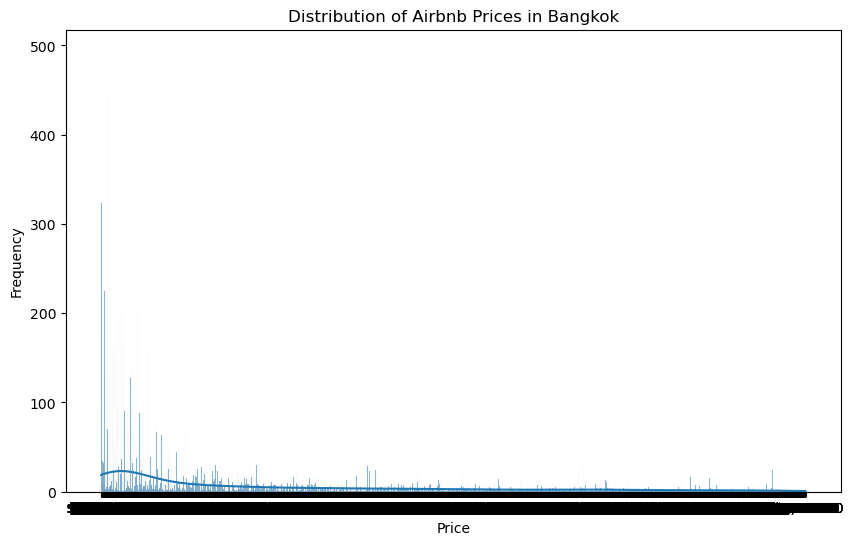

In [42]:
#Distribution of prices

plt.figure(figsize=(10, 6))
sns.histplot(df_listings['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices in Bangkok')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Room Type Distribution

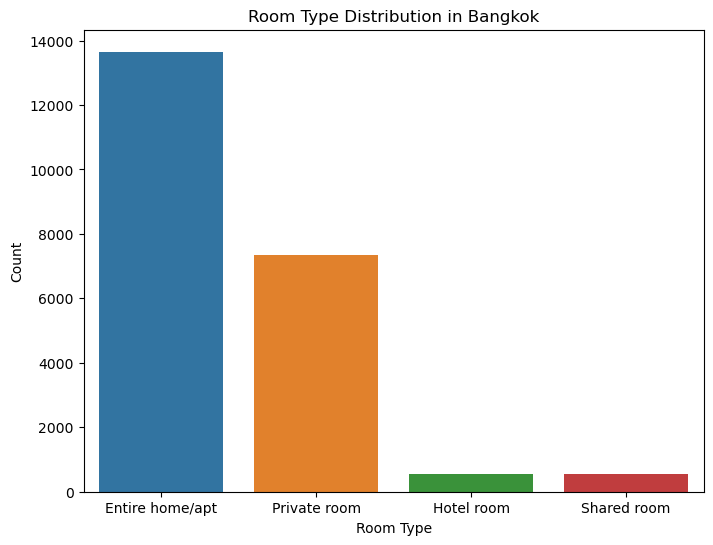

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_listings, x='room_type')
plt.title('Room Type Distribution in Bangkok')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# Geographic Analysis

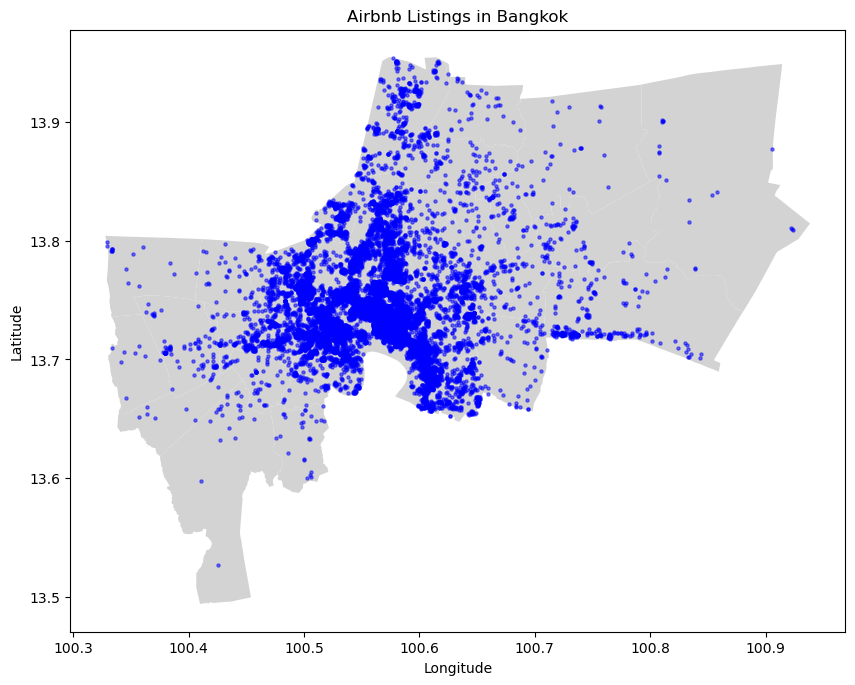

In [55]:
gdf_listings = gpd.GeoDataFrame(df_listings, 
                                geometry=gpd.points_from_xy(df_listings.longitude, df_listings.latitude),
                                crs=gdf_neighbourhoods.crs)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_neighbourhoods.plot(ax=ax, color='lightgrey')
gdf_listings.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title('Airbnb Listings in Bangkok')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Correlation Analysis

In [58]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_listings.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Airbnb Listings in Bangkok')
plt.show()

ValueError: could not convert string to float: 'https://www.airbnb.com/rooms/27934'

<Figure size 1200x800 with 0 Axes>

# Price vs Number of Reviews

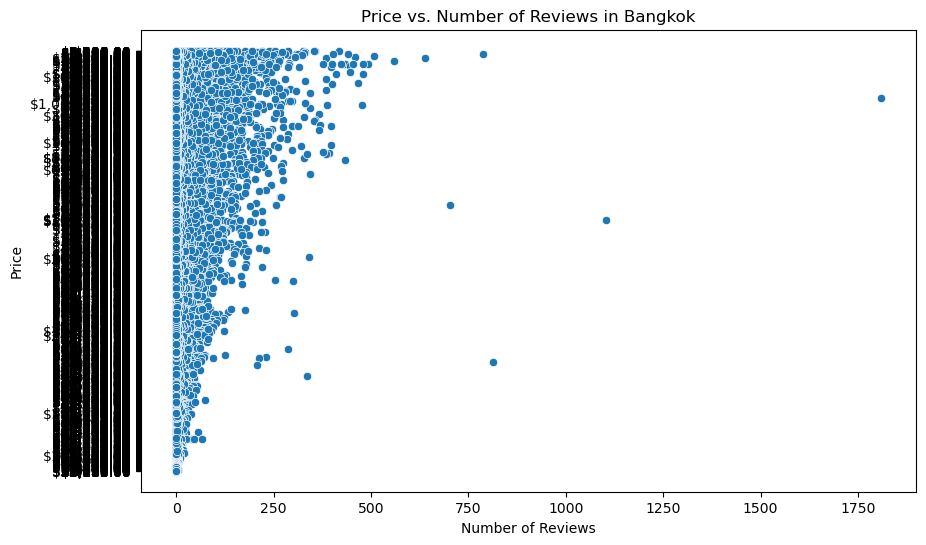

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df_listings)
plt.title('Price vs. Number of Reviews in Bangkok')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

# Monthly Trends in Reviews

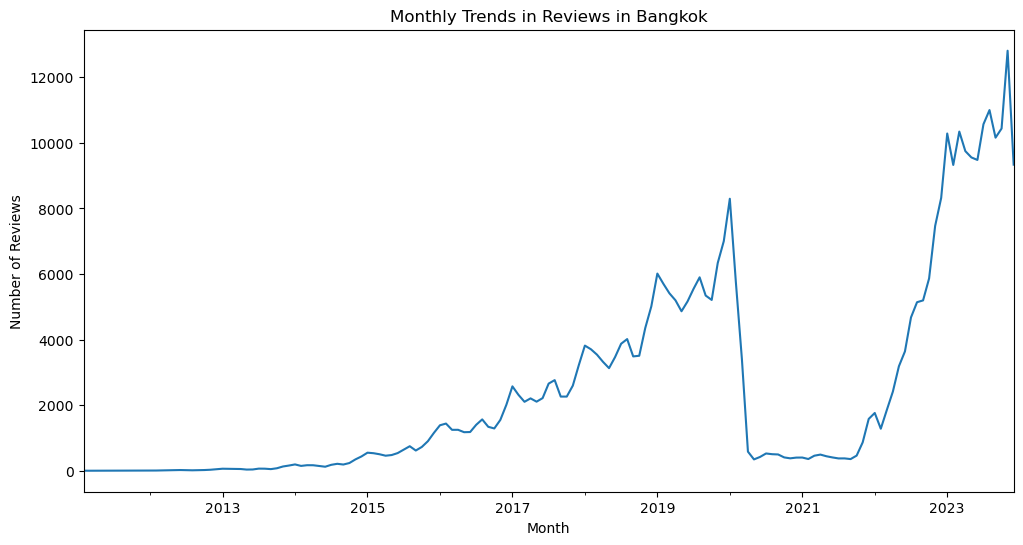

In [64]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
df_reviews['month'] = df_reviews['date'].dt.to_period('M')
reviews_per_month = df_reviews.groupby('month').size()

plt.figure(figsize=(12, 6))
reviews_per_month.plot()
plt.title('Monthly Trends in Reviews in Bangkok')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

In [68]:
# save file

df_listings.to_csv('cleaned_listings_bangkok.csv', index=False)